# Jupyter Notebook for Combining Results


### - Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### - Read Results and Prepare for Plotting:

In [4]:
rdqn_rewards = pd.read_csv('results/RDQN/total_rewards.csv')['reward'].rename("rdqn")
sac_results = pd.Series(np.load('algorithms/SAC/results/sac_kinematics_data.npz')['rewards']).rename("sac")
td3_rewards = pd.read_csv('algorithms/TD3/basicConfig/episodeRewards.csv')['Reward'].rename("td3")
ppo_rewards = pd.read_csv('results/PPO/mean_episode_return.csv')['mean_episode_return'].rename("ppo")
vpg_rewards = pd.read_csv('REINFORCE_Results/save_data_DRIVE_DIS_1000_1_0.001_0.006_0.85/reinforce_average_rewards.csv')['reward'].rename("reinforce")

rewards = pd.concat([rdqn_rewards,sac_results,td3_rewards,ppo_rewards,vpg_rewards],axis=1)
rewards.index.rename('Episode',inplace=True)

window = 20
rewards_smoothed_dict = {}
average_rewards_dict = {}
for agent in rewards:
    rewards_smoothed_dict[agent] = np.convolve(rewards[agent], np.ones(window) / window, mode="valid") / rewards[agent].max()
    average_rewards_dict[agent] = [rewards[agent][rewards[agent].notnull()][-50:].mean()]
rewards_smoothed = pd.DataFrame(rewards_smoothed_dict)
average_rewards = pd.DataFrame(average_rewards_dict).reset_index(drop=True)

### - Plot Average Reward:

,rdqn,sac,td3,ppo,reinforce
0,21.970108,101.82566,147.155181,22.65548,20.706888


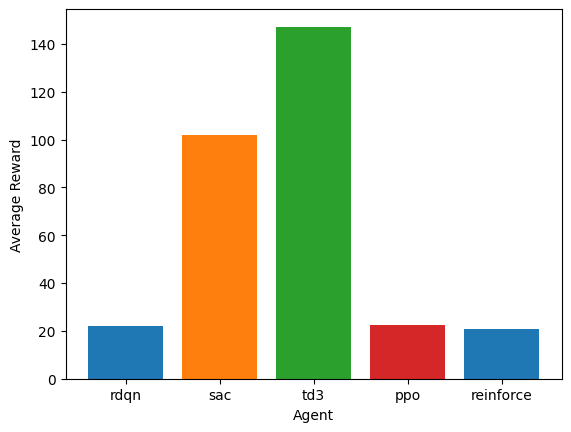

In [5]:
fig, ax = plt.subplots()
ax.bar(average_rewards.columns,average_rewards.iloc[0],color=plt.cm.tab10(range(4)),)
ax.set_ylabel("Average Reward")
ax.set_xlabel("Agent")
average_rewards

### - Plot Reward/Max:

<Axes: xlabel='Episode', ylabel='Smoothed Total Reward / Max Reward'>

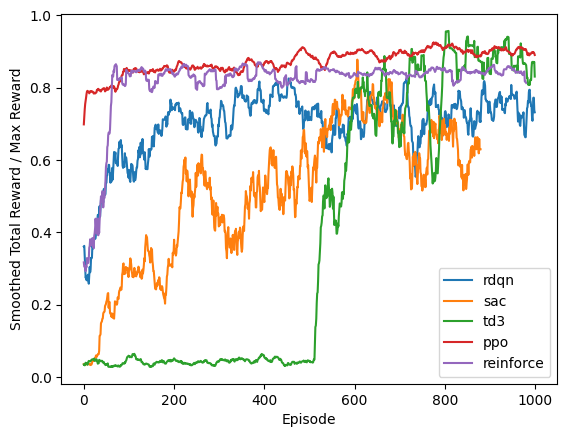

In [6]:
rewards_smoothed[:1000].plot(xlabel="Episode",ylabel="Smoothed Total Reward / Max Reward")